In [2]:
%matplotlib inline
import torch
from torch.distributions import multinomial
from d2l import torch as d2l

In [3]:
fair_probs = torch.ones([6])/6
multinomial.Multinomial(20,fair_probs).sample()

tensor([3., 9., 2., 4., 2., 0.])

multinomial的理解如下：
https://blog.csdn.net/m0_37738114/article/details/128937669
相当于离散的构建一个分布，ones的数量决定了有几种可能，概率之和为1，具体怎么分配看自己（这里是均分）
然后sample()就是对这个概率模型进行采样，multinomial里两个参数，第一个是抽样个数，第二个是抽样遵循的分布。
输出的结果就是各种可能一共被抽到了几次。

In [7]:
# 多抽取几次试试
numOfsamples = 100
counts = multinomial.Multinomial(numOfsamples,fair_probs).sample()
# 抽取次数/抽取总数就是各自频率
print(counts/numOfsamples)
# 换一个更大的，测试是否符合大数定律
numOfsamples = 100000
counts = multinomial.Multinomial(numOfsamples,fair_probs).sample()
# 抽取次数/抽取总数就是各自频率
print(counts/numOfsamples)
# 确实符合大数定律

tensor([0.1300, 0.1200, 0.2200, 0.2100, 0.1400, 0.1800])
tensor([0.1684, 0.1666, 0.1660, 0.1667, 0.1657, 0.1666])


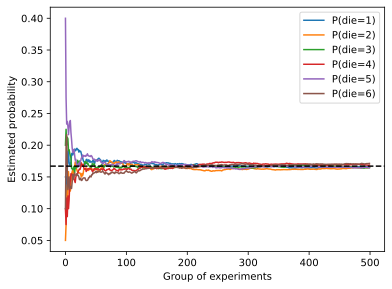

In [21]:
# 之前说过，multinomial的参数是抽样次数和规定的概率分布
# 而sample里面给的shape其实是抽这些次样本为一次实验，这样的实验做几次
# shape可以是多维的，但最终就是“sample shape”*probs（即再分布基础上左乘实验的大小）
counts = multinomial.Multinomial(20,fair_probs).sample((500,))
# print(counts)
# print(counts.shape)
# cumsum是按行累加。假设一共三行，如果是sum的话输出就是一行，对应三行的和
# 而cumsum的结果还是那些行，但是每行对应从第一行累加到该行的结果
# 在这里cumsum就代表着做N次同样的实验，每次抽取一定的样本。那么随着实验的累加，样本越来越多，查看频率的变化
# 理论上就应该是越来越逼近概率值（大数定律）
cum_counts = counts.cumsum(dim=0)
# print(cum_counts)
# 对每一行进行归一化，计算频率
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)
# print(cum_counts,'\n',estimates)
d2l.set_figsize((6,4.5))# 这个set_figsize是指要画的图画布的大小（就是显示一个几cm*几cm的图）
for i in range(6):
    # 上面那个estimates变量，横向是不同的事件，纵向是每多做一次实验，事件频率的变化
    # 现在把频率给plot出来，看看变化，label就是legend，标识不同的事件
    # 注意其实可以通过.numpy()把tensor转化一下
    d2l.plt.plot(estimates[:,i].numpy(),label=("P(die="+str(i+1)+")"))
# axhline([y, xmin, xmax, hold])	Add a horizontal line across the axis.
# 下面这个就是再水平方向上画一条线，线是黑的，还是虚线，位置在y=0.167，其实就是理想概率的位置
# 查看是否随着样本增多，收敛起来。
d2l.plt.axhline(y=0.167,color = 'black',linestyle = 'dashed')
# gca(**kwargs) Get the current Axes instance on the current figure matching the given keyword args, or create one.
# gca说白了就是定义坐标轴相关参数
d2l.plt.gca().set_xlabel('Group of experiments')
d2l.plt.gca().set_ylabel('Estimated probability')
d2l.plt.legend()
# 能从图里看到，频率是随着抽样增多逐渐收敛到概率的